In [93]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [94]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [95]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Loading Dataset
# Dataset link: https://data.mendeley.com/datasets/xvyv59vwvz/1
# Dataset is present in the current directory containing the code file.
df=pd.read_csv('../Datasets/ClaMP_Integrated-5184.csv')

## Preprocessing

In [96]:
df.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [97]:
# Replacing Null values with 0. ML classifer cannot learn on Null values
df.fillna(0, inplace=True)

In [98]:
# Peak on dataset
df.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [99]:
# Droping these columns due to their insignificance
df=df.drop(['NumberOfSections','CreationYear','e_cblp','e_cp','e_cparhdr','e_maxalloc'], axis=1)

In [100]:
df.shape

(5210, 64)

In [101]:
# Peak on the dataset
df.head()

,e_sp,e_lfanew,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4,FH_char5,FH_char6,FH_char7,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,184,256,0,1,0,0,0,0,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,184,184,0,1,1,1,0,0,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,184,272,0,1,0,0,0,0,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,184,184,0,1,0,0,0,0,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,184,224,0,1,0,0,0,0,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [102]:
yes,no = df['class'].value_counts()

In [103]:
print(yes,no)

2722 2488


In [104]:
#No class has less instances

In [105]:
# Encodings Labels so that they are compatible with machine leanring classifiers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue
X = df.drop(['class'],axis=1)
y = df['class']

In [106]:
# Now check the features for the feature column "Packer_type". They are converted fr
df.head()

,e_sp,e_lfanew,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4,FH_char5,FH_char6,FH_char7,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,184,256,0,1,0,0,0,0,0,1,...,1,3,0,18,6.603616,5.443362,1181520,6.627552,1,0
1,184,184,0,1,1,1,0,0,0,1,...,1,3,0,18,5.205926,2.123522,7680,5.318221,0,0
2,184,272,0,1,0,0,0,0,0,1,...,1,4,0,18,6.238000,3.380859,57872,6.507758,1,0
3,184,184,0,1,0,0,0,0,0,1,...,0,1,0,18,0.000000,0.000000,95616,4.575092,1,0
4,184,224,0,1,0,0,0,0,0,1,...,1,4,0,18,6.355626,0.702621,48128,5.545531,1,0


In [107]:
# Scaling data. Default scaling is to scale the data to unit variance (or equivalent
mms = MinMaxScaler()
X = mms.fit_transform(X)
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

In [108]:
class Encoder(nn.Module):
  def __init__(self):
    current_dims = 63
    encoded_dims = 15
    super().__init__()
    self.encoder = nn.Sequential(
        #N, 63
        nn.Linear(current_dims, current_dims*2),
        nn.BatchNorm1d(current_dims*2),
        nn.LeakyReLU(),
        nn.Linear(current_dims*2, current_dims),
        nn.BatchNorm1d(current_dims),
        nn.LeakyReLU(),
        nn.Linear(current_dims,encoded_dims),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    return encoded

In [109]:
encoder = Encoder()
encoder.load_state_dict(torch.load('encoder.pt'))
encoder.eval()

Encoder(
  (encoder): Sequential(
    (0): Linear(in_features=63, out_features=126, bias=True)
    (1): BatchNorm1d(126, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=126, out_features=63, bias=True)
    (4): BatchNorm1d(63, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=63, out_features=15, bias=True)
  )
)

In [110]:
X = encoder(X)

In [111]:
#mms = MinMaxScaler(feature_range = (-1,1))
#X = torch.tensor(mms.fit_transform(encoded_X.detach().numpy()))

In [112]:
print(X.min(), X.max())

tensor(-10.4013, grad_fn=<MinBackward1>) tensor(9.1075, grad_fn=<MaxBackward1>)


#### **Since we need to perform augmentation for "No Malware"**

In [113]:
encoded_X.max(), encoded_X.min()

(tensor(9.1075), tensor(-10.4013))

## MLP Classifier on encoded data

In [114]:
class Generator(nn.Module):
  z_dim = 64
  data_dim = 15
  def __init__(self, z_dim = z_dim, data_dim = data_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, data_dim),
        nn.BatchNorm1d(data_dim)
    )

  def forward(self, x):
    return self.gen(x)

In [115]:
gen = Generator()
gen.load_state_dict(torch.load("gan.pt"))
_ = gen.eval()
with torch.no_grad():
  out = gen(torch.randn(yes-no, gen.z_dim))
encoded_X = torch.cat((X,out)).detach()
y = torch.cat((y,torch.zeros(yes-no))).detach()

In [116]:
# Dividing data into training, testing and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=1)

In [117]:
pt_train = TensorDataset(X_train, y_train)
pt_train = DataLoader(pt_train, batch_size = 64)

In [118]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(15, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 15),
        nn.ReLU()
    )
    self.clf = nn.Sequential(
        nn.Linear(15, 1),
        nn.Sigmoid()
    )
  def forward(self, x):
      output = self.model(x)
      return self.clf(output)

In [119]:
mlp = MLP()
epochs = 100
lr = 4e-3
optimizer = torch.optim.Adam(mlp.parameters(), lr = lr)
criterion = nn.BCELoss()

In [120]:
import time
start = time.time()
losses = []
for epoch in range(epochs):
  for batch_idx, (x, target) in enumerate(pt_train):
    output = mlp(x)
    loss = criterion(output, target.view(-1,1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_idx == 0:
      print(
          f"Epoch [{epoch+1}/{epochs}] \ "
          f"Loss: {loss.item()}"
      ) 
  losses.append(loss.item())
end = time.time()

Epoch [1/100] \ Loss: 0.6762327551841736
Epoch [2/100] \ Loss: 0.16433466970920563
Epoch [3/100] \ Loss: 0.15487566590309143
Epoch [4/100] \ Loss: 0.1351594775915146
Epoch [5/100] \ Loss: 0.11652784794569016
Epoch [6/100] \ Loss: 0.10717907547950745
Epoch [7/100] \ Loss: 0.10674626380205154
Epoch [8/100] \ Loss: 0.08113283663988113
Epoch [9/100] \ Loss: 0.0975899025797844
Epoch [10/100] \ Loss: 0.08927182853221893
Epoch [11/100] \ Loss: 0.16844059526920319
Epoch [12/100] \ Loss: 0.07781679183244705
Epoch [13/100] \ Loss: 0.07886338979005814
Epoch [14/100] \ Loss: 0.0930674821138382
Epoch [15/100] \ Loss: 0.09518515318632126
Epoch [16/100] \ Loss: 0.09594622999429703
Epoch [17/100] \ Loss: 0.1434658020734787
Epoch [18/100] \ Loss: 0.10337398201227188
Epoch [19/100] \ Loss: 0.06356049329042435
Epoch [20/100] \ Loss: 0.09258898347616196
Epoch [21/100] \ Loss: 0.11674833297729492
Epoch [22/100] \ Loss: 0.07237895578145981
Epoch [23/100] \ Loss: 0.06396138668060303
Epoch [24/100] \ Loss: 0.

In [121]:
print(f"Took {end-start:.2f} seconds to train ")

Took 18.30 seconds to train 


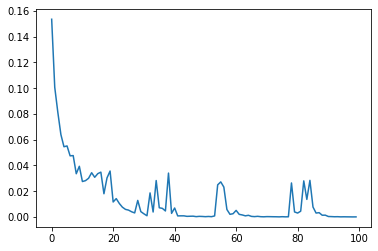

In [122]:
_ = plt.plot(losses)

In [123]:
_ = mlp.eval()

In [124]:
with torch.no_grad():
  lr_probs_1 = mlp(X_test).squeeze()
  ml_pred = lr_probs_1.round()

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ml_pred)
tn=cm[0][0] #tn
fn=cm[0][1] #fn
fp=cm[1][0] #fp
tp=cm[1][1] #tp
acc= (tp+tn)/(tp+tn+fn+fp)
epsilon = 1e-7 # is used so that to avoid divide by zero error
precision = tp / (tp + fp + epsilon)
recall = tp / (tp + fn + epsilon)
sensitivity,specificity = tp/(tp+fn),tn/(tn+fp)
print("Test accuracy is:"+str(format(acc,'.4f')))
print("Precision: "+str(format(precision,'.4f'))+" Recall: "+str(format(recall,'.4f')))

Test accuracy is:0.9660
Precision: 0.9629 Recall: 0.9683


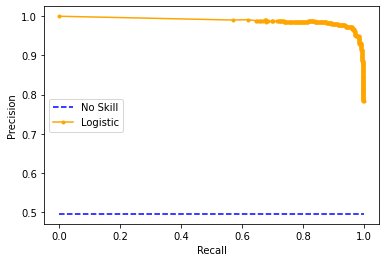

F1: 0.9655813953488371
AUC: 0.9888833210692428
Accuracy 0.9660238751147842


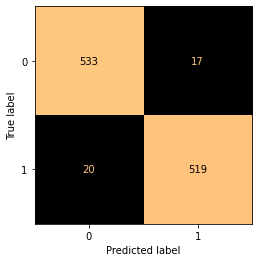

In [126]:
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs_1)
lr_f1, lr_auc = f1_score(y_test, ml_pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
acc = accuracy_score(y_test, ml_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', c = "blue")
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic', c = "orange")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
print("F1:",lr_f1)
print("AUC:",lr_auc)
print("Accuracy",acc)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
_ = disp.plot(cmap="copper", colorbar = False)

In [127]:
torch.save(mlp.state_dict(), "mlp_5.pt")

In [128]:
torch.save(gen.state_dict(),"gan.pt")